In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# def plot_feature_importance(importance,names,model_type):

#     #Create arrays from feature importance and feature names
#     feature_importance = np.array(importance)
#     feature_names = np.array(names)

#     #Create a DataFrame using a Dictionary
#     data={'feature_names':feature_names,'feature_importance':feature_importance}
#     fi_df = pd.DataFrame(data)

#     #Sort the DataFrame in order decreasing feature importance
#     fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True))

In [ ]:
#data = pd.read_csv('sample_data/Test data1.csv')

In [74]:
#data = pd.read_csv('sample_data/Data_COVID_AD.csv')
data = pd.read_csv('sample_data/data_example_AD.csv')

In [75]:
data=data.drop(['index','windex_ahrq','windex_vw','ad','dlb','ftd','vd'],1) ##deleting three feature##deleting three feature for all data

In [76]:
data.head()

,chf,carit,valv,pcd,pvd,hypunc,hypc,para,ond,cpd,diabunc,diabc,hypothy,rf,ld,pud,aids,lymph,metacanc,solidtum,rheumd,coag,obes,wloss,fed,blane,dane,alcohol,drug,psycho,depre,score,wscore_ahrq,wscore_vw,Age,Gender,Ethnicity,Mortality,Race
0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,9,5,9,65,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48,1,2,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,1,1,0,1
3,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3,10,10,53,1,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,1,2,0,2


In [73]:
#data=data.drop(['index','windex_ahrq','windex_vw','ad','dlb','ftd','vd'],1) ##deleting three feature##deleting three feature

KeyError: ignored

In [77]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
dataset.head()

,chf,carit,valv,pcd,pvd,hypunc,hypc,para,ond,cpd,diabunc,diabc,hypothy,rf,ld,pud,aids,lymph,metacanc,solidtum,rheumd,coag,obes,wloss,fed,blane,dane,alcohol,drug,psycho,depre,score,wscore_ahrq,wscore_vw,Age,Gender,Ethnicity,Mortality,Race
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.3,0.289474,0.287234,0.546512,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.245614,0.191489,0.348837,0.5,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.245614,0.191489,0.581395,0.5,0.5,0.0,0.5
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.333333,0.297872,0.406977,0.5,0.0,0.0,0.5
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.245614,0.191489,0.209302,0.5,1.0,0.0,1.0


In [78]:
dataset.head()

,chf,carit,valv,pcd,pvd,hypunc,hypc,para,ond,cpd,diabunc,diabc,hypothy,rf,ld,pud,aids,lymph,metacanc,solidtum,rheumd,coag,obes,wloss,fed,blane,dane,alcohol,drug,psycho,depre,score,wscore_ahrq,wscore_vw,Age,Gender,Ethnicity,Mortality,Race
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.3,0.289474,0.287234,0.546512,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.245614,0.191489,0.348837,0.5,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.245614,0.191489,0.581395,0.5,0.5,0.0,0.5
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.333333,0.297872,0.406977,0.5,0.0,0.0,0.5
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.245614,0.191489,0.209302,0.5,1.0,0.0,1.0


In [13]:
dataset.shape

(4176, 39)

In [79]:
from sklearn.model_selection import train_test_split

In [ ]:
# from sklearn.preprocessing import StandardScaler

# #sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
rfc = RandomForestClassifier(n_estimators=1000)

In [81]:
# Data preprocessing
X = dataset.drop(['Mortality'],axis=1)
y = dataset['Mortality']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [83]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [84]:
from sklearn.metrics import accuracy_score

In [85]:
y_predict = rfc.predict(X_test)
accuracy_score(y_test, y_predict)

0.9630827513336597

In [86]:
feature_ranking = pd.DataFrame(rfc.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_ranking

,importance
Age,0.204847
wscore_ahrq,0.111310
wscore_vw,0.101953
score,0.076404
Race,0.044159
Ethnicity,0.037278
Gender,0.026416
diabunc,0.020304
hypothy,0.019230
cpd,0.018744


In [88]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    #Define size of bar plot
    plt.figure(figsize=(11,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title('Risk factor-Random Forest',fontsize=20)
    plt.xlabel('Feature importance',fontsize=20)
    plt.ylabel('Feature name',fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.savefig( model_type +' feature importance.png')

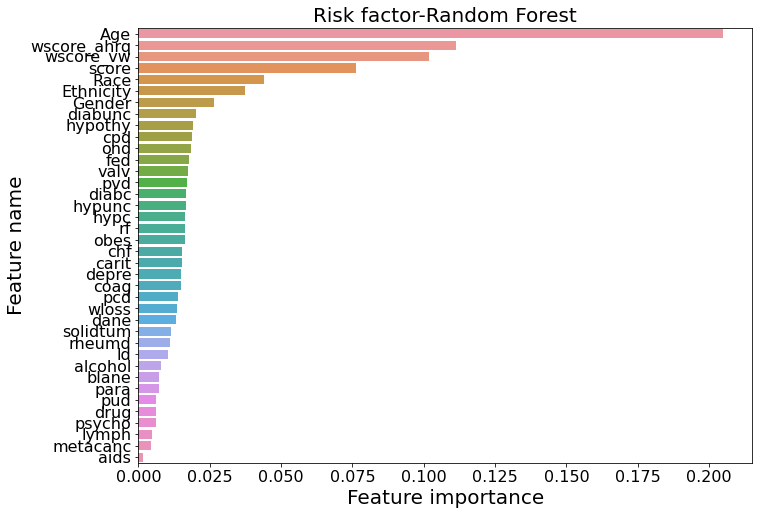

In [89]:
plot_feature_importance(rfc.feature_importances_, X_train.columns,'RANDOM FOREST')

In [ ]:
from google.colab import files
files.download('RANDOM FOREST feature importance.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#https://www.analyseup.com/learn-python-for-data-science/python-random-forest-feature-importance-plot.html#:~:text=plot_feature_importance(xgb_model.feature_importances_%2Ctrain.columns%2C%27XG%20BOOST%27)
##https://sefiks.com/2021/01/06/feature-importance-in-logistic-regression/
#https://machinelearningmastery.com/feature-selection-with-the-caret-r-package/

In [117]:
from xgboost import XGBClassifier

In [118]:
xgb= XGBClassifier(n_estimators=1000)

In [119]:
xgb.fit(X_train,y_train)

XGBClassifier(n_estimators=1000)

In [120]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    #Define size of bar plot
    plt.figure(figsize=(11,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title('Risk factor-XGBoost',fontsize=20)
    plt.xlabel('Feature importance',fontsize=20)
    plt.ylabel('Feature name',fontsize=20)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.savefig( model_type +' feature importance.png')

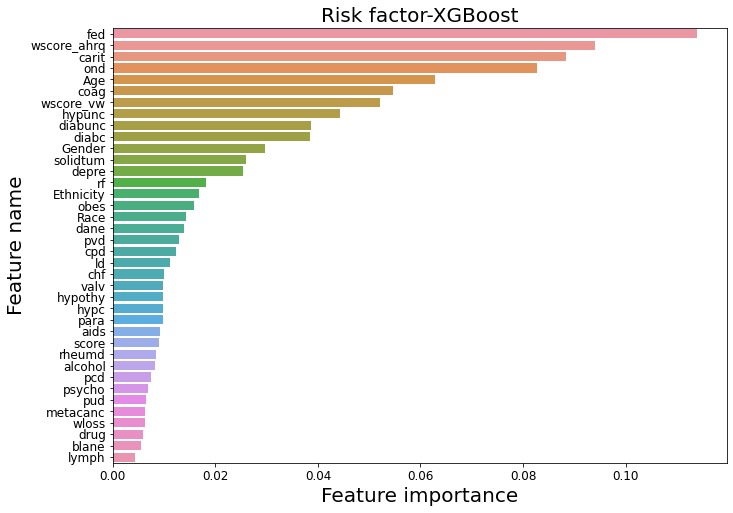

In [121]:
plot_feature_importance(xgb.feature_importances_,X_train.columns,'XG BOOST')

In [107]:
!pip install catboost


     |████████████████████████████████| 76.1 MB 1.3 MB/s 


In [108]:
from catboost import CatBoostClassifier

In [109]:
cbt= CatBoostClassifier(n_estimators=1000)

In [110]:
cbt.fit(X_train,y_train)

Learning rate set to 0.119398
0:	learn: 0.4982447	total: 143ms	remaining: 2m 22s
1:	learn: 0.3770256	total: 203ms	remaining: 1m 41s
2:	learn: 0.2795025	total: 279ms	remaining: 1m 32s
3:	learn: 0.2239198	total: 350ms	remaining: 1m 27s
4:	learn: 0.1887075	total: 420ms	remaining: 1m 23s
5:	learn: 0.1675047	total: 503ms	remaining: 1m 23s
6:	learn: 0.1530541	total: 571ms	remaining: 1m 20s
7:	learn: 0.1404079	total: 639ms	remaining: 1m 19s
8:	learn: 0.1339824	total: 702ms	remaining: 1m 17s
9:	learn: 0.1286296	total: 771ms	remaining: 1m 16s
10:	learn: 0.1246870	total: 837ms	remaining: 1m 15s
11:	learn: 0.1210561	total: 900ms	remaining: 1m 14s
12:	learn: 0.1187910	total: 972ms	remaining: 1m 13s
13:	learn: 0.1173287	total: 1.03s	remaining: 1m 12s
14:	learn: 0.1154979	total: 1.1s	remaining: 1m 12s
15:	learn: 0.1142752	total: 1.17s	remaining: 1m 11s
16:	learn: 0.1135561	total: 1.23s	remaining: 1m 11s
17:	learn: 0.1129014	total: 1.29s	remaining: 1m 10s
18:	learn: 0.1121818	total: 1.36s	remaining: 

In [115]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    #Define size of bar plot
    plt.figure(figsize=(8,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title('Risk factor-CatBoost',fontsize=20)
    plt.xlabel('Feature importance',fontsize=20)
    plt.ylabel('Feature name',fontsize=20)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.savefig( model_type +' feature importance.png')

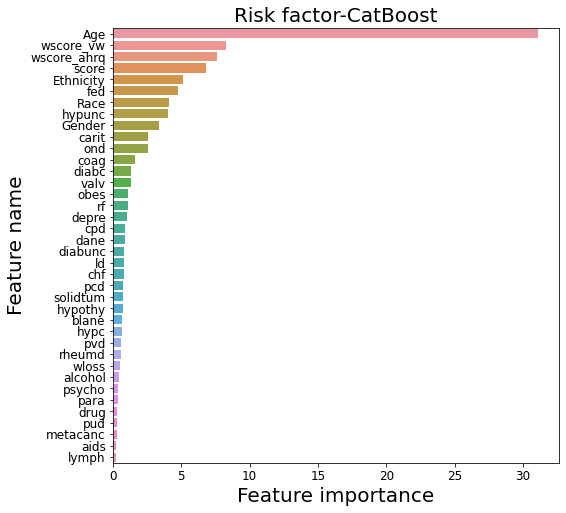

In [116]:
plot_feature_importance(cbt.feature_importances_,X_train.columns,'CATBOOST')

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
dct= DecisionTreeClassifier()

In [47]:
dct.fit(X_train,y_train)

DecisionTreeClassifier()

In [48]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    #Define size of bar plot
    plt.figure(figsize=(11,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title('Risk factor-Decision Tree',fontsize=20)
    plt.xlabel('Feature importance',fontsize=20)
    plt.ylabel('Feature name',fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.savefig( model_type +' feature importance.png')

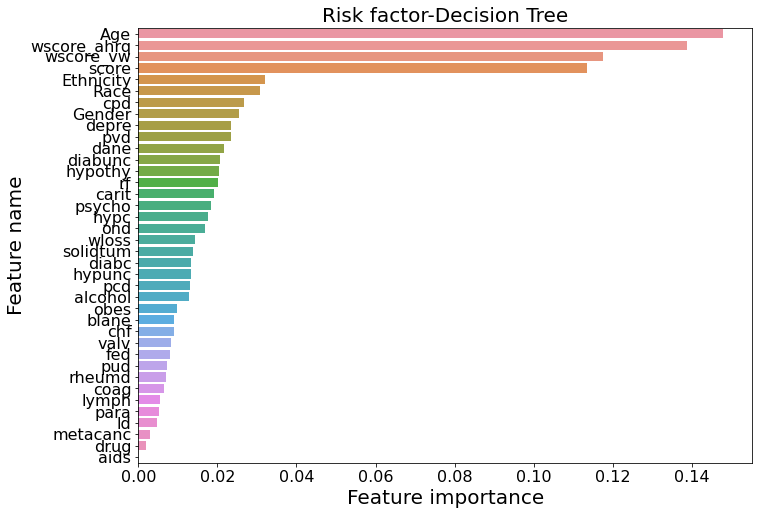

In [49]:
plot_feature_importance(dct.feature_importances_,X_train.columns,'DECISION TREE')

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
lgR = LogisticRegression()

In [52]:
# instantiate the model
#model = lgR(objective="reg:squarederror", colsample_bytree=0.3, learning_rate=0.01, max_depth=6, reg_alpha=15, n_estimators=1000, subsample=0.5)

# fit the model
lgR.fit(X_train, y_train)


LogisticRegression()

In [ ]:
lgR.fit(X_train,y_train)

ValueError: ignored

In [53]:
plot_feature_importance(lgR.feature_importances_,X_train.columns,'LOGISTIC REGRESSION')

AttributeError: ignored

In [54]:
importance = lgR.coef_[0]
colnames = list(X_train.columns) 

In [55]:
plt.figure(figsize=(10,8))
#Plot Searborn bar chart
sns.barplot(x=importance, y=columns[indices[f]])
#Add chart labels
plt.title(model_type + 'Feature importance',fontsize=16)
plt.xlabel('FEATURE IMPORTANCE', fontsize=16)
plt.ylabel('FEATURE NAMES', fontsize=16)

NameError: ignored

<Figure size 720x576 with 0 Axes>

In [64]:
from sklearn.ensemble import AdaBoostClassifier

In [65]:
abc = AdaBoostClassifier()
abc.fit(X_train, y_train)
y_predict = abc.predict(X_test)
accuracy_score(y_test, y_predict)

0.8217703349282297

In [66]:
feature_ranking = pd.DataFrame(abc.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_ranking

,importance
wscore_ahrq,0.22
Age,0.20
wscore_vw,0.12
Gender,0.04
score,0.04
solidtum,0.02
aids,0.02
Ethnicity,0.02
depre,0.02
dane,0.02


In [ ]:
feature_ranking = pd.DataFrame(rfc.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_ranking

In [122]:
Adb=AdaBoostClassifier()

In [123]:
Adb.fit(X_train,y_train)

AdaBoostClassifier()

In [125]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    #Define size of bar plot
    plt.figure(figsize=(11,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title('Risk factor-Adaboost',fontsize=20)
    plt.xlabel('Feature importance',fontsize=20)
    plt.ylabel('Feature name',fontsize=20)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.savefig( model_type +' feature importance.png')

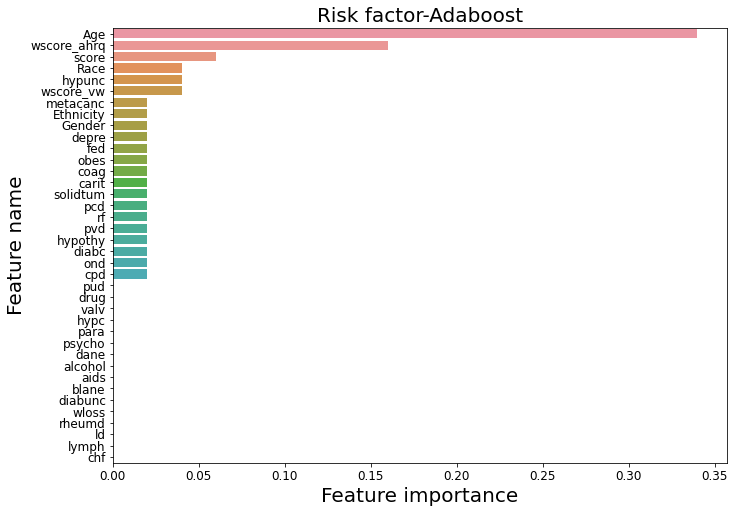

In [126]:
plot_feature_importance(Adb.feature_importances_,X_train.columns,'Ada Boost')

In [ ]:
from google.colab import files
files.download('Ada Boost feature importance.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(tol=1e-3, random_state=0)
perceptron=ppn.fit(X_train, y_train)

ValueError: ignored

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset.columns

Index(['T(t-15)', 'T(t-30)', 'T(t-45)', 'T(t-60)', 'T((t-15)-(t-30))',
       'T((t-30)-(t-45))', 'T((t-45)-(t-60))', 'Time of day', 'Day', 'Week',
       'Weekday', 'Month', 'Weather', 'Tt'],
      dtype='object')

In [ ]:

corr =X.corr()
print(corr)

                   T(t-15)   T(t-30)   T(t-45)  ...  Weekday     Month   Weather
T(t-15)           1.000000  0.989117  0.977841  ...      NaN  0.024317  0.000009
T(t-30)           0.989117  1.000000  0.989118  ...      NaN  0.024288  0.000955
T(t-45)           0.977841  0.989118  1.000000  ...      NaN  0.024250 -0.000665
T(t-60)           0.967492  0.977877  0.989153  ...      NaN  0.024346  0.000143
T((t-15)-(t-30))  0.073505 -0.074028 -0.076697  ...      NaN  0.000193 -0.006412
T((t-30)-(t-45))  0.076192  0.073517 -0.074011  ...      NaN  0.000253  0.010980
T((t-45)-(t-60))  0.070292  0.076348  0.073676  ...      NaN -0.000650 -0.005485
Time of day       0.015999  0.016102  0.015717  ...      NaN  0.000288  0.029105
Day               0.002136  0.002354  0.002579  ...      NaN  0.865024 -0.000368
Week                   NaN       NaN       NaN  ...      NaN       NaN       NaN
Weekday                NaN       NaN       NaN  ...      NaN       NaN       NaN
Month             0.024317  

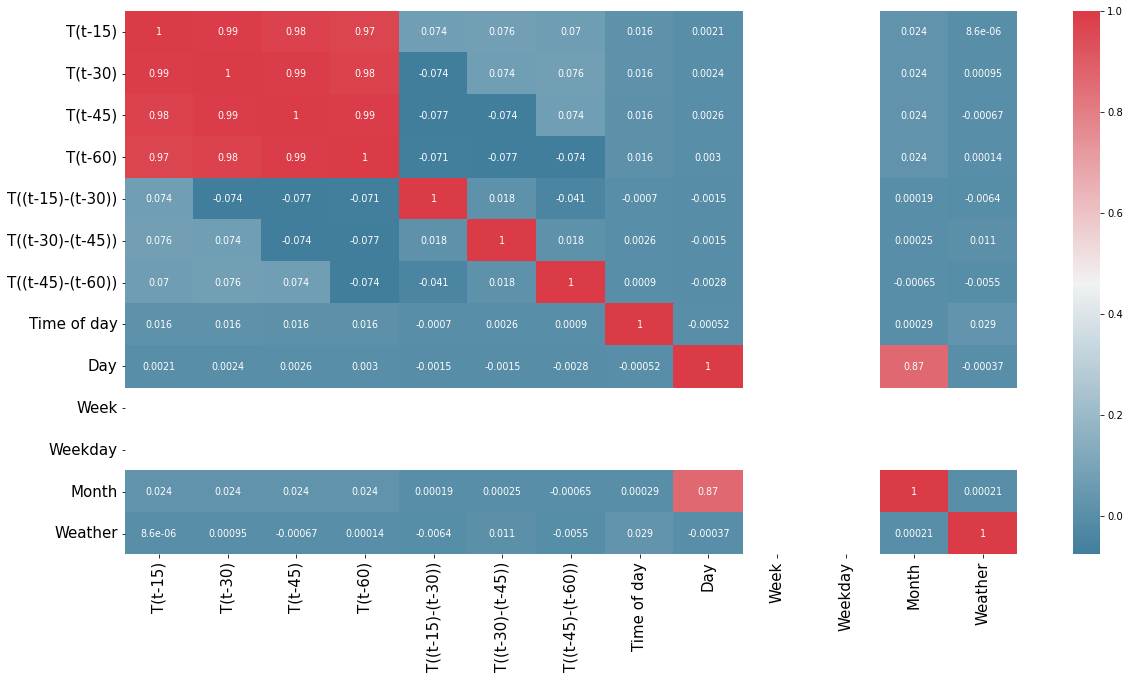

In [ ]:
f, ax = plt.subplots(figsize=(20, 10))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 10, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = None, cmap=cmap,annot_kws={"size":9.5})
#plt.xlabel('False Positive Rate', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.ylabel('Features',fontsize=20)
#plt.title('ROC-CFS',fontsize=25)
plt.savefig('heatmap_ckd.png')

In [ ]:
from google.colab import files
files.download('heatmap_ckd.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = X.columns[columns]
data = X[selected_columns]

In [ ]:
data.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,wc,rc,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane
0,0.522727,0.230769,0.897469,0.161101,0.114717,0.211538,0.088575,0.082679,0.846515,0.130627,0.836735,0.242581,0.612523,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,0.056818,0.000000,0.897469,0.559417,0.114717,0.277112,0.042362,0.077773,0.796461,0.133576,0.557823,0.169283,0.498982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.681818,0.230769,0.692408,0.293873,0.639510,0.856838,0.132221,0.090037,0.809226,0.155071,0.442177,0.230365,0.388515,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.522727,0.153846,0.589877,0.559417,0.114717,0.202991,0.139923,0.114564,0.671924,0.105951,0.551020,0.197788,0.354205,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
4,0.556818,0.230769,0.692408,0.293873,0.114717,0.179487,0.062901,0.085132,0.816786,0.125290,0.578231,0.222221,0.483364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
data.shape

(400, 23)

In [ ]:
from google.colab import files
files.download('heatmap_ckd.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def correlation (dataset,threshold):
  col_corr=set()
  corr_matrix=dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix[i,j]) > threshold:
        colname=corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr


In [ ]:
corr_features = correlation(X_train, 0.7)

KeyError: ignored

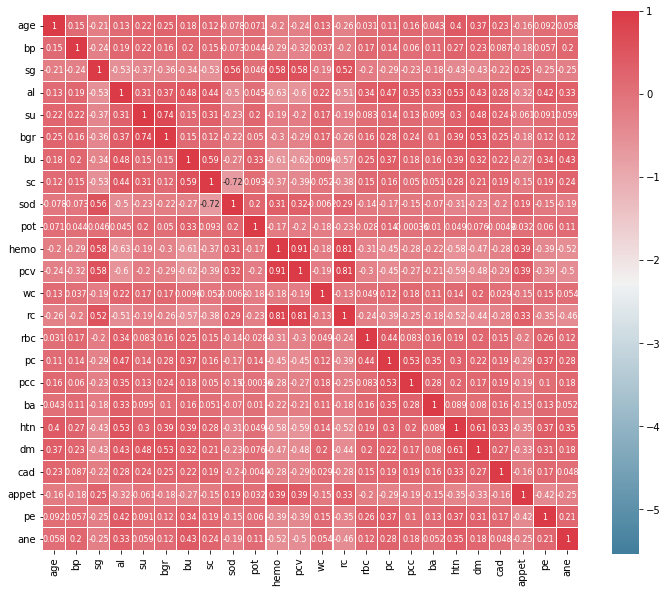

In [ ]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X.corr()
#sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
#sns.heatmap(cor,annot=True,annot_kws={"size":8})
sns.heatmap(cor, vmin=data.values.min(), vmax=1, square=True, 
       linewidths=0.1, annot=True, cmap=cmap, annot_kws={"size":8})
plt.show()

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:

corr_features = correlation(X_train, 0.5)
len(set(corr_features))

12

In [ ]:

corr_features

{'al',
 'ane',
 'bgr',
 'bu',
 'dm',
 'hemo',
 'htn',
 'pcc',
 'pcv',
 'rc',
 'sc',
 'sod'}

In [ ]:
import numpy as np
from xgboost import XGBRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

# generate some data
#X, y = make_regression(n_samples=1000, n_features=5, random_state=100)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# instantiate the model
model = XGBRegressor(objective="reg:squarederror", colsample_bytree=0.3, learning_rate=0.01, max_depth=6, reg_alpha=15, n_estimators=1000, subsample=0.5)

# fit the model
model.fit(X_train, y_train, early_stopping_rounds=30, eval_metric=["rmse", "mae"], eval_set=[(X_train, y_train), (X_test, y_test)], verbose=True)

# extract the feature importances
thresholds = np.sort(model.feature_importances_)

# select the features
selection = SelectFromModel(model, threshold=thresholds[2], prefit=True)

feature_idx = selection.get_support()
print(feature_idx)
# array([ True,  True,  True, False, False])

selected_dataset = selection.transform(X_test)
print(selected_dataset.shape)
# (200, 3)

[0]	validation_0-rmse:0.398469	validation_0-mae:0.375266	validation_1-rmse:0.398618	validation_1-mae:0.374983
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 30 rounds.
[1]	validation_0-rmse:0.395437	validation_0-mae:0.372217	validation_1-rmse:0.395657	validation_1-mae:0.372021
[2]	validation_0-rmse:0.391725	validation_0-mae:0.368703	validation_1-rmse:0.391962	validation_1-mae:0.368519
[3]	validation_0-rmse:0.38807	validation_0-mae:0.365236	validation_1-rmse:0.388326	validation_1-mae:0.365069
[4]	validation_0-rmse:0.384474	validation_0-mae:0.361824	validation_1-rmse:0.384739	validation_1-mae:0.361659
[5]	validation_0-rmse:0.381352	validation_0-mae:0.358817	validation_1-rmse:0.381657	validation_1-mae:0.358711
[6]	validation_0-rmse:0.37782	validation_0-mae:0.355466	validation_1-rmse:0.378138	validation_1-mae:0.355364
[7]	validation_0-rmse:0.374344	validation_0-mae:0.352165	validation_1-rmse:

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
from sklearn.datasets import make_regression
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
model = AdaBoostRegressor()

In [ ]:
model.fit(X, y)

AdaBoostRegressor()

In [ ]:
from sklearn.datasets import make_regression
from sklearn.ensemble import AdaBoostRegressor
# define dataset
#X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=6)
# define the model
model = AdaBoostRegressor()
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [[1.20871625,0.88440466,-0.9030013,-0.22687731,-0.82940077,-1.14410988,1.26554256,-0.2842871,1.43929072,0.74250241,0.34035501,0.45363034,0.1778756,-1.75252881,-1.33337384,-1.50337215,-0.45099008,0.46160133,0.58385557,-1.79936198]]
yhat = model.predict(row)
print('Prediction: %d' % yhat[0])

In [ ]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(11,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title('Risk factor-Adaboost',fontsize=20)
    plt.xlabel('Feature importance',fontsize=20)
    plt.ylabel('Feature name',fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.savefig( model_type +' feature importance.png')

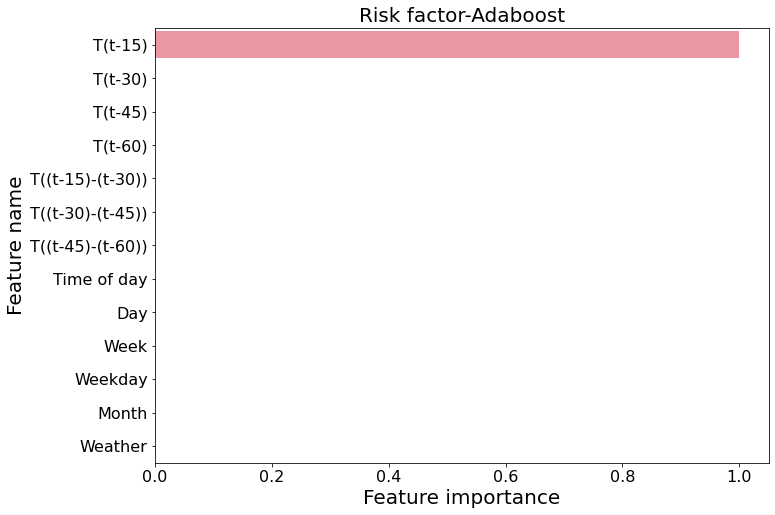

In [ ]:
plot_feature_importance(model.feature_importances_,X_train.columns,'Ada Boost')